# Subgradient Step Size Experiment

Consider minimizing a piecewise linear function $$\text{minimize} \ \ f(x)=\max_{i=1,\ldots,m}(a_{i}^{T}x+b_{i})$$ with varible $x\in\mathbb{R}^{n}$. Finding a subgradient of $f$ is easy: given $x$, we first find an index $j$ for which $$a_{j}^{T}x+b_{j}=\max_{i=1,\ldots,m}(a_{i}^{T}x+b_{i})$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
n = 20
m = 100

a = np.random.normal(0, 1, (n, m))
b = np.random.normal(0, 1, (m, 1))
x = np.ones(n)/n

print(a.shape)
print(b.shape)
print(x.shape)

def obj(a, x, b):
    return np.max(a.T@x.reshape(-1,1)+b)

def sub_grad(a, x, b):
    return a[:,np.argmax(a.T@x.reshape(-1,1)+b)]
    
# print(obj(a,x,b))
# print(sub_grad(a,x,b))

(20, 100)
(100, 1)
(20,)


In [20]:
def subgrad_descent(a, x, b, lambd=0.01, T=4000, lr_op="constantSS", alpha=0.5, beta=0.5):

    xs = np.zeros((n, T))
    xs[:, 0] = x

    for i in range(T-1):

        if lr_op == "constantSS":
            lr = 0.001
        elif lr_op == "constantSL":
            #lr = (lambd/np.linalg.norm(sub_grad(a, xs[:, i], b)))
            lr = lambd / np.max(np.linalg.norm(a, ord=2, axis=0))
        elif lr_op == "SqSumNotSum":
            lr = alpha / (beta + i)
        elif lr_op== "NonSumDimSS":
            lr = (lambd/np.sqrt(i+1))
        elif lr_op == "NonSumDimSL":
            lr = (lambd/np.sqrt(i+1)) / np.max(np.linalg.norm(a, ord=2, axis=0))

        xs[:,i+1] = xs[:,i] - lr * sub_grad(a, xs[:, i], b)

    return xs

In [22]:
T = 4000

xs1 = subgrad_descent(a, x, b, 0.05, T)
xs2 = subgrad_descent(a, x, b, 0.01, T)
xs3 = subgrad_descent(a, x, b, 0.005, T)

xsop = subgrad_descent(a, x, b, 0.00003, 1000000)

In [23]:
fs1 = [obj(a, xs1[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]
fs2 = [obj(a, xs2[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]
fs3 = [obj(a, xs3[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]

Text(0.5, 0, 't')

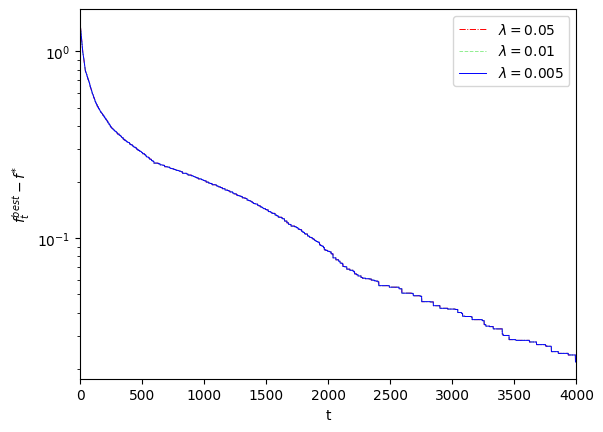

In [24]:
plt.plot(np.minimum.accumulate(fs1), label=r"$\lambda=0.05$", color="red", ls="-.", lw=0.7)
plt.plot(np.minimum.accumulate(fs2), label=r"$\lambda=0.01$", color="lightgreen", ls="--", lw=0.7)
plt.plot(np.minimum.accumulate(fs3), label=r"$\lambda=0.005$", color="blue", ls="-", lw=0.7)

plt.yscale("log")

plt.xlim(0, T)
plt.legend()

plt.ylabel(r"$f_{t}^{best} - f^{*}$")
plt.xlabel("t")


In [25]:
# ConSS = subgrad_descent(a, x, b, lr_op="constantSS")
# ConSL = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.01)
# SquSumNotSum = subgrad_descent(a, x, b, lr_op="SqSumNotSum", alpa=0.5, beta=0.5)
# NonSumDimSS = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.01)
# NonSumDimSL = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.01)

# plt.plot(np.minimum.accumulate([obj(a, ConSS[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]), label="ConSS", ls="-", lw=0.7)
# plt.plot(np.minimum.accumulate([obj(a, ConSL[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]), label="ConSL", color="black", ls="--", lw=0.7)
# plt.plot(np.minimum.accumulate([obj(a, SquSumNotSum[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]), label="SquSumNotSum", ls="-.", lw=0.7)
# plt.plot(np.minimum.accumulate([obj(a, NonSumDimSS[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]), label="NonSumDimSS", ls=":", lw=0.7)
# plt.plot(np.minimum.accumulate([obj(a, NonSumDimSL[:,i], b)-obj(a, xsop[:,-1], b) for i in range(T)]), label="NonSumDimSL", ls=":", lw=0.7)

# plt.legend()
# plt.yscale("log")
# plt.ylabel(r"$f_{t}^{best} - f^{*}$")
# plt.xlabel("t")

In [26]:
## Constant Step Length
ConSL1 = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.1)
ConSL2 = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.05)
ConSL3 = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.01)
ConSL4 = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.005)

ConSL_op = subgrad_descent(a, x, b, lr_op="constantSL", lambd=0.0005, T=1000000)

Text(0.5, 0, 't')

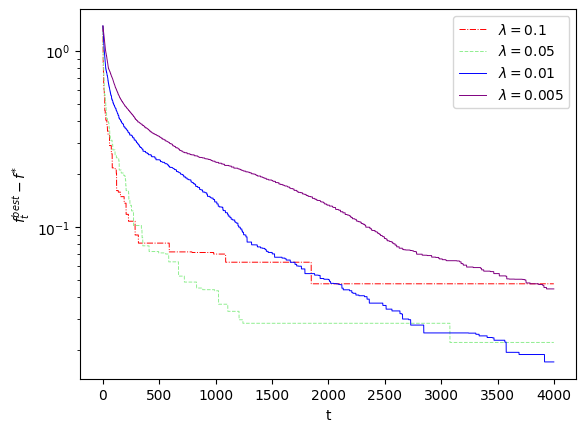

In [27]:
plt.plot(np.minimum.accumulate([obj(a, ConSL1[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, ConSL2[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, ConSL3[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, ConSL4[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

plt.legend()
plt.yscale("log")
plt.ylabel(r"$f_{t}^{best} - f^{*}$")
plt.xlabel("t")

In [28]:
## Squared Sum Not Sum
SquSumNotSum1 = subgrad_descent(a, x, b, lr_op="SqSumNotSum", alpha=0.5, beta=0.5)
SquSumNotSum2 = subgrad_descent(a, x, b, lr_op="SqSumNotSum", alpha=0.5, beta=1)
SquSumNotSum3 = subgrad_descent(a, x, b, lr_op="SqSumNotSum", alpha=1, beta=0.5)
SquSumNotSum4 = subgrad_descent(a, x, b, lr_op="SqSumNotSum", alpha=1, beta=1)

SquSumNotSum_op = subgrad_descent(a, x, b, lr_op="constantSL", alpha=1, beta=1, T=1000000)

Text(0.5, 0, 't')

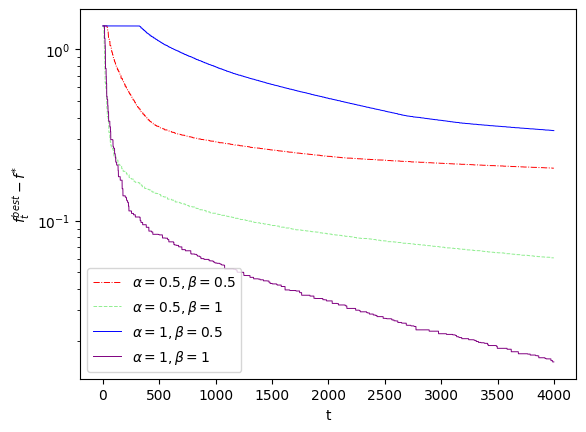

In [29]:
plt.plot(np.minimum.accumulate([obj(a, SquSumNotSum1[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$\alpha=0.5, \beta=0.5$", color="red", ls="-.", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, SquSumNotSum2[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$\alpha=0.5, \beta=1$", color="lightgreen", ls="--", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, SquSumNotSum3[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$\alpha=1, \beta=0.5$", color="blue", ls="-", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, SquSumNotSum4[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$\alpha=1, \beta=1$", color="purple", ls="-", lw=0.7)

plt.legend()
plt.yscale("log")
plt.ylabel(r"$f_{t}^{best} - f^{*}$")
plt.xlabel("t")

In [30]:
## Non Sum Dimension Step Size
NonSumDimSS1 = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.1)
NonSumDimSS2 = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.05)
NonSumDimSS3 = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.01)
NonSumDimSS4 = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.005)

NonSumDimSS_op = subgrad_descent(a, x, b, lr_op="NonSumDimSS", lambd=0.1, T=100000)

Text(0.5, 0, 't')

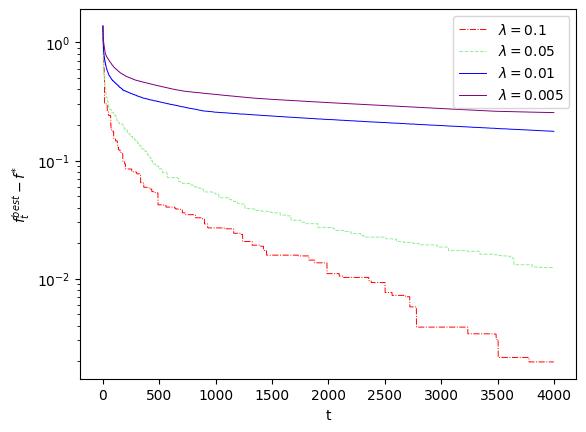

In [31]:
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSS1[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSS2[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSS3[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSS4[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

plt.legend()
plt.yscale("log")
plt.ylabel(r"$f_{t}^{best} - f^{*}$")
plt.xlabel("t")

In [32]:
## Non Sum Dimension Step Length
NonSumDimSL1 = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.1)
NonSumDimSL2 = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.05)
NonSumDimSL3 = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.01)
NonSumDimSL4 = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.005)

NonSumDimSL = subgrad_descent(a, x, b, lr_op="NonSumDimSL", lambd=0.01, T=1000000)

Text(0.5, 0, 's')

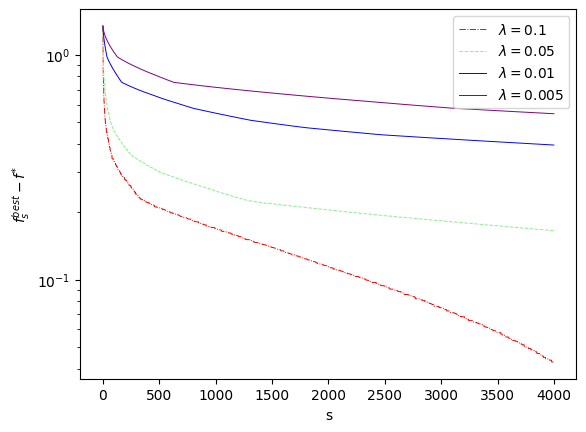

In [33]:
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSL1[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSL2[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSL3[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
plt.plot(np.minimum.accumulate([obj(a, NonSumDimSL4[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

plt.legend()
plt.yscale("log")
plt.ylabel(r"$f_{s}^{best} - f^{*}$")
#plt.ylim(1e-10, 1e-0)
plt.xlabel("s")

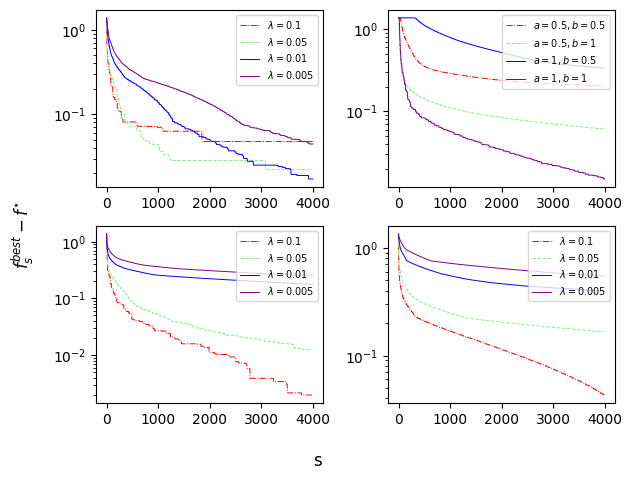

In [36]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL1[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL2[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL3[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL4[:,i], b)-obj(a, ConSL_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[0, 0].legend(prop={'size':7}, loc="upper right")
ax[0, 0].semilogy()
fig.supylabel(r"$f_{s}^{best} - f^{\star}$")
fig.supxlabel("s")
#ax[0, 0].set_title("Constant step length")


ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum1[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$a=0.5, b=0.5$", color="red", ls="-.", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum2[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$a=0.5, b=1$", color="lightgreen", ls="--", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum3[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$a=1, b=0.5$", color="blue", ls="-", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum4[:,i], b)-obj(a, SquSumNotSum_op[:,-1], b) for i in range(T)]), label=r"$a=1, b=1$", color="purple", ls="-", lw=0.7)

ax[0, 1].legend(prop={'size':7}, loc="upper right")
ax[0, 1].semilogy()
# ax[0, 1].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[0, 1].set_xlabel("t")
#ax[0, 1].set_title("Square summable but not summable")


ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS1[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS2[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS3[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS4[:,i], b)-obj(a, NonSumDimSS_op[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[1, 0].legend(prop={'size':7}, loc="upper right")
ax[1, 0].semilogy()
# ax[1, 0].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[1, 0].set_xlabel("t")
#ax[1, 0].set_title("Non-summable diminishing ss")


ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL1[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL2[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL3[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL4[:,i], b)-obj(a, NonSumDimSL[:,-1], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[1, 1].legend(prop={'size':7}, loc="upper right")
ax[1, 1].semilogy()

# ax[1, 1].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[1, 1].set_xlabel("t")
#ax[1, 1].set_title("Non-summable diminishing sl")

fig.tight_layout()
fig.savefig("C:/Users/benwi/Jupyter Notebooks/Convex Optimisation/subgrad_descent.png", format="png", dpi=300, bbox_inches="tight", pad_inches=0.1, metadata=None)

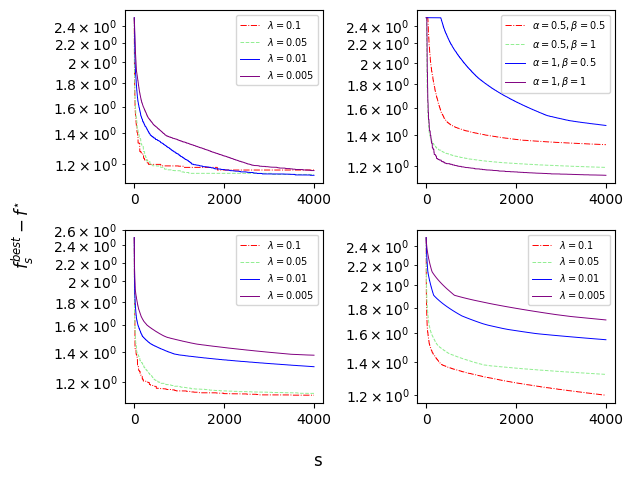

In [35]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL1[:,i], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL2[:,i], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL3[:,i], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[0, 0].plot(np.minimum.accumulate([obj(a, ConSL4[:,i], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[0, 0].legend(prop={'size':7}, loc="upper right")
ax[0, 0].semilogy()
fig.supylabel(r"$f_{s}^{best} - f^{\star}$")
fig.supxlabel("s")
#ax[0, 0].set_title("Constant step length")


ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum1[:,i], b) for i in range(T)]), label=r"$\alpha=0.5, \beta=0.5$", color="red", ls="-.", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum2[:,i], b) for i in range(T)]), label=r"$\alpha=0.5, \beta=1$", color="lightgreen", ls="--", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum3[:,i], b) for i in range(T)]), label=r"$\alpha=1, \beta=0.5$", color="blue", ls="-", lw=0.7)
ax[0, 1].plot(np.minimum.accumulate([obj(a, SquSumNotSum4[:,i], b) for i in range(T)]), label=r"$\alpha=1, \beta=1$", color="purple", ls="-", lw=0.7)

ax[0, 1].legend(prop={'size':7}, loc="upper right")
ax[0, 1].semilogy()
# ax[0, 1].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[0, 1].set_xlabel("t")
#ax[0, 1].set_title("Square summable but not summable")


ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS1[:,i], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS2[:,i], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS3[:,i], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[1, 0].plot(np.minimum.accumulate([obj(a, NonSumDimSS4[:,i], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[1, 0].legend(prop={'size':7}, loc="upper right")
ax[1, 0].semilogy()
# ax[1, 0].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[1, 0].set_xlabel("t")
#ax[1, 0].set_title("Non-summable diminishing ss")


ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL1[:,i], b) for i in range(T)]), label=r"$\lambda=0.1$", color="red", ls="-.", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL2[:,i], b) for i in range(T)]), label=r"$\lambda=0.05$", color="lightgreen", ls="--", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL3[:,i], b) for i in range(T)]), label=r"$\lambda=0.01$", color="blue", ls="-", lw=0.7)
ax[1, 1].plot(np.minimum.accumulate([obj(a, NonSumDimSL4[:,i], b) for i in range(T)]), label=r"$\lambda=0.005$", color="purple", ls="-", lw=0.7)

ax[1, 1].legend(prop={'size':7}, loc="upper right")
ax[1, 1].semilogy()

# ax[1, 1].set_ylabel(r"$f_{t}^{best} - f^{*}$")
# ax[1, 1].set_xlabel("t")
#ax[1, 1].set_title("Non-summable diminishing sl")

fig.tight_layout()
fig.savefig("C:/Users/benwi/Jupyter Notebooks/Convex Optimisation/subgrad_descent.png", format="png", dpi=300, bbox_inches="tight", pad_inches=0.1, metadata=None)